In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Function to print all information about DataFrame
def review_dataframe(df):
    print(" DATA INFO ".center(125,'-'))
    print(df.info())
    
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)
    
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())

In [3]:
df_cars = pd.read_csv('data/cars.csv')
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
review_dataframe(df_cars)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype  

In [5]:
# Add auto mark (company)
df_cars['company'] = df_cars['CarName'].apply(lambda x : x.split(' ')[0])
print(f'Number of cars companies: {df_cars.company.nunique()}')
print(df_cars.company.unique())

Number of cars companies: 28
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [6]:
def fix_company_name(old_name, new_name):
    df_cars.company.replace(old_name, new_name, inplace=True)

In [7]:
# to lower register (for example 'Nissan' and 'nissan')
df_cars.company = df_cars.company.str.capitalize()

# Change for right versions
fix_company_name('Alfa-romero', 'Alfa-Romero')
fix_company_name('Bmw', 'BMW')
fix_company_name('Maxda', 'Mazda')
fix_company_name('Porcshce', 'Porsche')
fix_company_name('Toyouta', 'Toyota')
fix_company_name('Vokswagen', 'Volkswagen')
fix_company_name('Vw', 'Volkswagen')

print(f'Number of cars companies: {df_cars.company.nunique()}')
print(df_cars.company.unique())

Number of cars companies: 22
['Alfa-Romero' 'Audi' 'BMW' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'
 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth'
 'Porsche' 'Renault' 'Saab' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']


In [8]:
# Use this predictors, filter df
nec_columns = ['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 
               'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 
               'enginesize', 'boreratio', 'horsepower', 'price'
              ]
df_cars_filt = df_cars[nec_columns]
df_cars_filt

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,Alfa-Romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,Alfa-Romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,Alfa-Romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,Audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,Audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Volvo,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,Volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,Volvo,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,Volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0


C:\Users\gpapu\AppData\Local\Temp\ipykernel_18372\158818267.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cars_filt.corr(), annot=True, cmap='coolwarm', fmt='.3f')


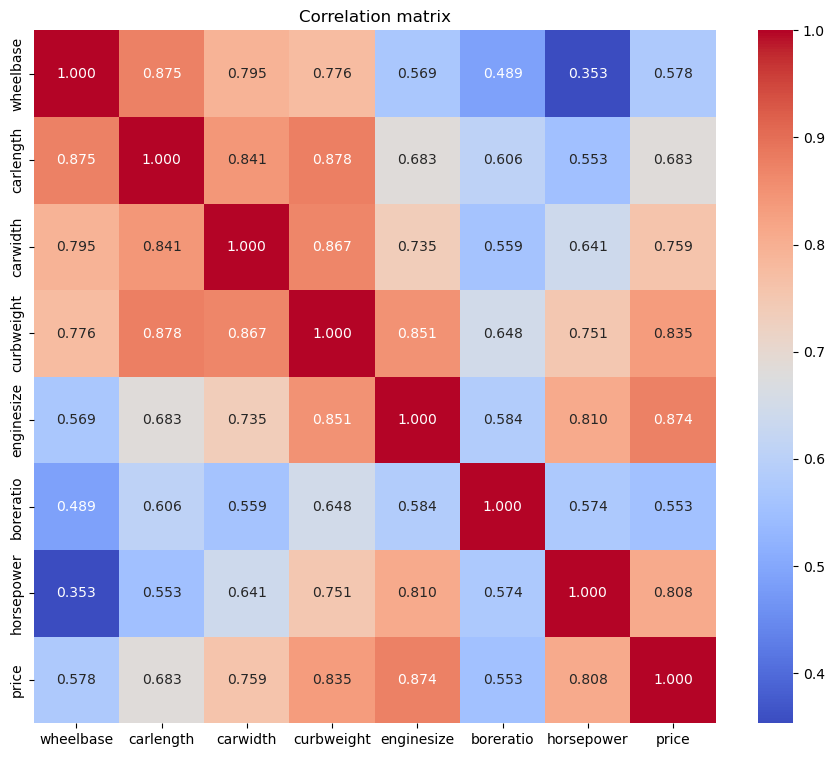

In [9]:
plt.figure(figsize=(11, 9))
sns.heatmap(df_cars_filt.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation matrix')
plt.show()

In [12]:
# for using linear regression change object type
df_dummy = pd.get_dummies(data=df_cars_filt[['company', 'fueltype', 'aspiration', 'carbody', 
                                             'drivewheel', 'enginetype', 'cylindernumber']], 
                          drop_first=True)
df_cars_LR = pd.concat([df_cars_filt.drop(['company', 'fueltype', 'aspiration', 'carbody', 
                                           'drivewheel', 'enginetype', 'cylindernumber'],
                                          axis='columns'), 
                        df_dummy], axis=1)
df_cars_LR

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_Audi,company_BMW,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [15]:
# model with one price predictor - horsepower
result = smf.ols('price ~ horsepower', df_cars_LR).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.48e-48
Time:                        20:52:31   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Make 2 models:
#     - with all predictors
#     - with all predictors except for car brands
X = df_cars_LR.drop(['price'], axis='columns')
X = sm.add_constant(X)
Y = df_cars_LR['price']

model_1 = sm.OLS(Y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.86e-89
Time:                        20:58:54   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+04   1.17e+04     -2.959      0.004   -5.79e+04   -1.15e+04
wheelbase               147.1396     76.234      1.930      0.055      -3.429     297.708
carlength              -113.2012     48.949     -2.313      0.022    -209.881     -16.522
carwidth                809.1860    214.508      3.772      0.000     385.514    1232.858
curbweight                4.1822      1.582      2.643      0.009       1.057       7.307
enginesize               61.4212     23.643      2.598      0.010      14.724     108.119
boreratio             -4319.4728   1759.825     -2.454      0.015   -7795.288    -843.657
horsepower               34.7010     18.000      1.928      0.056      -0.850      70.252
company_Audi            437.1040   2125.971      0.206      0.837   -3761.885    4636.093
company_BMW            7993.4998   2105.132      3.797      0.000    3835.671    1.22e+04
company_Buick          3431.0969   2472.252      1.388      0.167   -1451.829    8314.023
company_Chevrolet     -2107.0167   2054.269     -1.026      0.307   -6164.387    1950.353
company_Dodge         -3034.5530   1686.337     -1.799      0.074   -6365.224     296.118
company_Honda         -2328.7396   1622.141     -1.436      0.153   -5532.617     875.138
company_Isuzu          -926.1643   1819.489     -0.509      0.611   -4519.823    2667.495
company_Jaguar         2695.2664   2546.268      1.059      0.291   -2333.847    7724.379
company_Mazda         -1291.5657   1652.561     -0.782      0.436   -4555.527    1972.395
company_Mercury       -2762.0259   2786.701     -0.991      0.323   -8266.016    2741.965
company_Mitsubishi    -3699.6473   1650.046     -2.242      0.026   -6958.640    -440.654
company_Nissan        -1488.1217   1563.564     -0.952      0.343   -4576.305    1600.061
company_Peugeot       -2671.4595   1795.328     -1.488      0.139   -6217.398     874.479
company_Plymouth      -3052.1258   1670.829     -1.827      0.070   -6352.166     247.915
company_Porsche        4915.9715   2797.761      1.757      0.081    -609.864    1.04e+04
company_Renault       -2865.2197   2073.046     -1.382      0.169   -6959.676    1229.237
company_Saab            719.8222   1767.620      0.407      0.684   -2771.390    4211.035
company_Subaru        -1.164e+04   3416.221     -3.407      0.001   -1.84e+04   -4892.375
company_Toyota        -2608.7871   1539.320     -1.695      0.092   -5649.086     431.512
company_Volkswagen    -2261.9355   1606.886     -1.408      0.161   -5435.683     911.812
company_Volvo            68.2605   1943.170      0.035      0.972   -3769.679    3906.200
fueltype_gas           -243.7792    908.310     -0.268      0.789   -2037.774    1550.216
aspiration_turbo        596.6566    676.548      0.882      0.379    -739.588    1932.902
carbody_hardtop       -

In [23]:
columns_to_keep = df_cars_LR.columns[~df_cars_LR.columns.str.startswith('company_')]
X = df_cars_LR[columns_to_keep].drop('price', axis='columns')
X = sm.add_constant(X)
Y = df_cars_LR.price
model_2 = sm.OLS(Y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           9.86e-81
Time:                        21:12:34   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+04    1.3e+04     -1.309      0.192   -4.26e+04    8625.219
wheelbase                71.1868     87.028      0.818      0.414    -100.552     242.925
carlength               -51.3497     50.341     -1.020      0.309    -150.692      47.993
carwidth                541.8700    253.327      2.139      0.034      41.958    1041.782
curbweight                2.9577      1.796      1.647      0.101      -0.585       6.501
enginesize               36.0515     22.376      1.611      0.109      -8.105      80.208
boreratio             -2230.4519   1731.681     -1.288      0.199   -5647.719    1186.815
horsepower               86.8164     16.717      5.193      0.000      53.827     119.806
fueltype_gas          -2423.0935    975.579     -2.484      0.014   -4348.283    -497.904
aspiration_turbo      -1139.2334    787.230     -1.447      0.150   -2692.738     414.271
carbody_hardtop       -3728.0949   1519.366     -2.454      0.015   -6726.383    -729.807
carbody_hatchback     -4639.1279   1294.594     -3.583      0.000   -7193.855   -2084.401
carbody_sedan         -3337.7854   1356.075     -2.461      0.015   -6013.838    -661.732
carbody_wagon         -4315.4661   1465.089     -2.946      0.004   -7206.646   -1424.287
drivewheel_fwd          297.2402   1121.766      0.265      0.791   -1916.431    2510.912
drivewheel_rwd         1939.1594   1226.536      1.581      0.116    -481.263    4359.582
enginetype_dohcv      -1.713e+04   4540.120     -3.773      0.000   -2.61e+04   -8171.142
enginetype_l           2176.0521   1332.818      1.633      0.104    -454.106    4806.211
enginetype_ohc         4006.5687    897.437      4.464      0.000    2235.584    5777.553
enginetype_ohcf        5421.2822   1388.078      3.906      0.000    2682.076    8160.488
enginetype_ohcv       -5001.2242   1345.435     -3.717      0.000   -7656.280   -2346.169
enginetype_rotor      -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
cylindernumber_five   -1.389e+04   2891.599     -4.802      0.000   -1.96e+04   -8180.353
cylindernumber_four   -1.618e+04   3243.610     -4.989      0.000   -2.26e+04   -9780.800
cylindernumber_six    -1.175e+04   2287.516     -5.135      0.000   -1.63e+04   -7231.547
cylindernumber_three  -9264.0553   4750.899     -1.950      0.053   -1.86e+04     111.279
cylindernumber_twelve -1.214e+04   3386.507     -3.585      0.000   -1.88e+04   -5458.378
cylindernumber_two    -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
==============================================================================
Omnibus:                       18.493   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.728
Skew:                           0.293   Prob(JB):       

### It is better to choose the model with the least number of predictors, since R2 has not changed very much, and some brands are not significant at all

### The chosen model explains 90% of the variance. Among the predictors (10 out of 27) were insignificant (p > 0.05). With a single change in the horsepower indicator, the price increases by 86.8164
